### ***EDA***
- Exploring the data to gain a better understanding of it, before model building

#### ***Exploration Ideas***
- Summary stats
- Basic time series graph to see variation in precipitation over time
- Visualisation of seasonality
- Monthly / Seasonal Averages between decades -> is there a change in precip seasonality and overall levels over long periods of time?
- Correlations between last year overall precipitation and plastic pollution recorded

#### ***Packages***


In [125]:
# pip install nbformat 
# 

In [162]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px

##### ***Grabbing Dataframes***

In [127]:
ts_df = pd.read_pickle('C:\\Users\\liamr\\Documents\\Playground\\backup\\river_plastic_pollution\\data\\ts_df.pkl')
plastic_pollution = pd.read_pickle('C:\\Users\\liamr\\Documents\\Playground\\backup\\river_plastic_pollution\\data\\SE_top_10_pts.pkl')

##### ***Cleaning***

- Removing the first decade due to inconsistency, likely to do with how WorldClim collect / processed the data

In [128]:
ts_df = ts_df[ts_df['year'] >= 1970]

In [129]:
# modify the dataframe by adding a column for month-year
ts_df['year_month'] = ts_df['year'].astype(str) + '-' + ts_df['month'].astype(str)

In [130]:
ts_df.info()

# convert year_month to string format
ts_df['year_month'] = ts_df['year_month'].astype(str)


ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1200 to 7199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   river_ID           6000 non-null   int64  
 1   country            6000 non-null   object 
 2   lon                6000 non-null   float64
 3   lat                6000 non-null   float64
 4   year               6000 non-null   int64  
 5   month              6000 non-null   int64  
 6   avg_precipitation  6000 non-null   float32
 7   year_month         6000 non-null   object 
dtypes: float32(1), float64(2), int64(3), object(2)
memory usage: 398.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1200 to 7199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   river_ID           6000 non-null   int64  
 1   country            6000 non-null   object 
 2   lon                6000 non-null   floa

In [131]:
ts_df.head()

,river_ID,country,lon,lat,year,month,avg_precipitation,year_month
1200,1,Malaysia,101.38875,3.00292,1970,1,30.50,1970-1
1201,2,Vietnam,106.74708,10.49875,1970,1,29.25,1970-1
1202,3,Thailand,100.55795,13.61573,1970,1,32.00,1970-1
1203,4,Myanmar,96.19083,16.77458,1970,1,32.00,1970-1
1204,5,Malaysia,110.39875,1.55542,1970,1,29.50,1970-1


In [132]:
# checking avg_precipitation_all_rivers_per_year is correct
ts_df[(ts_df['year_month'] >= '1990-12') & 
                 (ts_df['year_month'] <= '1991-01')]


,river_ID,country,lon,lat,year,month,avg_precipitation,year_month
3610,1,Malaysia,101.38875,3.00292,1990,2,32.00,1990-2
3611,2,Vietnam,106.74708,10.49875,1990,2,31.25,1990-2
3612,3,Thailand,100.55795,13.61573,1990,2,33.00,1990-2
3613,4,Myanmar,96.19083,16.77458,1990,2,34.75,1990-2
3614,5,Malaysia,110.39875,1.55542,1990,2,30.25,1990-2
...,...,...,...,...,...,...,...,...
3715,6,Malaysia,101.41125,2.80458,1990,12,30.00,1990-12
3716,7,Myanmar,96.10625,16.84125,1990,12,32.50,1990-12
3717,8,Malaysia,102.24458,6.18208,1990,12,29.00,1990-12
3718,9,Malaysia,103.34292,3.80625,1990,12,29.00,1990-12


In [153]:
# modify the dataframe by adding a column which averages the avg_precipitation across months 1-12 for each separate year
ts_df['avg_precipitation_all_rivers_per_year'] = ts_df.groupby(['year'])['avg_precipitation'].transform('mean')

# modify the dataframe by adding a column which averages the avg_precipitation across rivers 1-10 for each separate month
ts_df['avg_precipitation_all_rivers_per_month'] = ts_df.groupby(['year_month'])['avg_precipitation'].transform('mean')


##### ***Summary Stats***

In [134]:
ts_summary_stats = ts_df.describe()
print(ts_summary_stats)

          river_ID          lon          lat         year       month  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.00000   
mean      5.500000   102.218586     7.657781  1994.500000     6.50000   
std       2.872521     4.110972     5.903516    14.432072     3.45234   
min       1.000000    96.106250     1.496250  1970.000000     1.00000   
25%       3.000000   100.557950     2.804580  1982.000000     3.75000   
50%       5.500000   101.827915     4.994165  1994.500000     6.50000   
75%       8.000000   103.797500    13.615730  2007.000000     9.25000   
max      10.000000   110.398750    16.841250  2019.000000    12.00000   

       avg_precipitation  avg_precipitation_all_rivers_per_year  
count        6000.000000                            6000.000000  
mean           31.462126                              31.462126  
std             1.654789                               0.361322  
min            27.000000                              30.727083  
25%         

In [135]:
pollution_summary_stats = plastic_pollution.describe()
print(pollution_summary_stats)

              lon        lat  pollution_volume
count   10.000000  10.000000         10.000000
mean   102.218586   7.657781       3997.597000
std      4.332984   6.222334       3182.455284
min     96.106250   1.496250       2143.480000
25%    100.765650   2.854165       2472.345000
50%    101.827915   4.994165       3051.955000
75%    103.683855  12.836485       3924.345000
max    110.398750  16.841250      12816.000000


#### Precipitation Data
- Plot precipitation trends over time
    - Is there seasonality?
    - Are there long term trends?

## ***Trend Analysis***

### ***Long-Term Trends | All Rivers | Annual Precipitation***

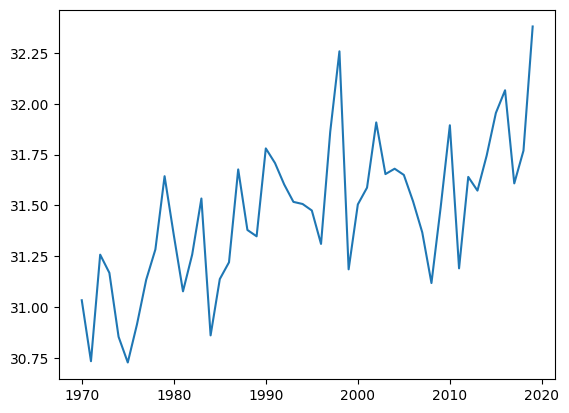

In [136]:
# using matplotlib
plt.plot(ts_df['year'],ts_df['avg_precipitation_all_rivers_per_year'])
plt.show()

In [137]:
# using plotly
fig = px.line(ts_df, x="year", y="avg_precipitation_all_rivers_per_year")
fig.show()


### ***Since 2010 | All Rivers | Annual Precipitation***

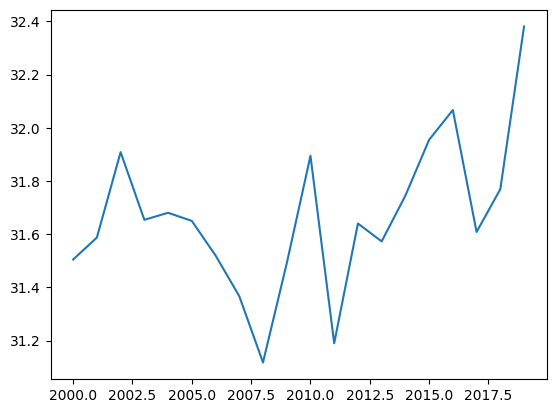

In [138]:
# using matplotlib since 2000
ts_df_2000 = ts_df[ts_df['year'] >= 2000]

plt.plot(ts_df_2000['year'], ts_df_2000['avg_precipitation_all_rivers_per_year'])
plt.show()

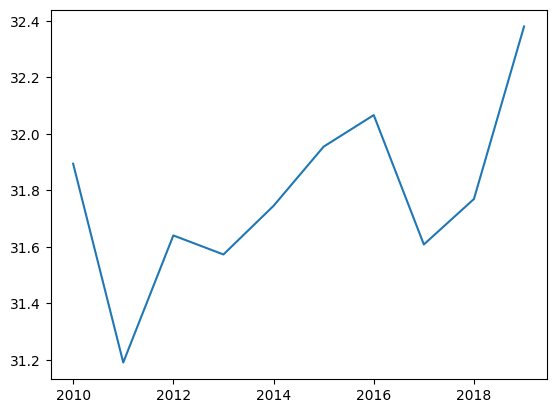

In [139]:
# using matplotlib since 2010
ts_df_2010 = ts_df[ts_df['year'] >= 2010]

plt.plot(ts_df_2010['year'], ts_df_2010['avg_precipitation_all_rivers_per_year'])
plt.show()

In [140]:
# using plotly since 2000
fig = px.line(ts_df_2000, x="year", y="avg_precipitation_all_rivers_per_year")   
fig.show()

In [141]:
# using plotly
fig = px.line(ts_df_2010, x="year", y="avg_precipitation_all_rivers_per_year")   
fig.show()

### **Trend Analysis Summary:**
- There is a clear upward trend since 1970 up until 2019
- Can see from the graphs that the trend has been relatively stable since 2000
    - Therefore this is a good period to use in my analysis when averaging precipitation levels across all years

##### **For analysis:** Will average the precipitation data from 2000-2019 for each month across the years

## ***Seasonality Analysis***

In [ ]:
# 2019 precipitation
ts_df_2019 = ts_df[ts_df['year'] == 2019]
fig1 = px.line(ts_df_2019, x="year_month", y="avg_precipitation_all_rivers_per_month")   

# 2010 precipitation
ts_df_2010 = ts_df[ts_df['year'] == 2010]
fig2 = px.line(ts_df_2010, x="year_month", y="avg_precipitation_all_rivers_per_month")   

# 2000 precipitation
ts_df_2000 = ts_df[ts_df['year'] == 2000]
fig3 = px.line(ts_df_2010, x="year_month", y="avg_precipitation_all_rivers_per_month") 

# 1990 precipitation
ts_df_1990 = ts_df[ts_df['year'] == 1990]
fig4 = px.line(ts_df_1990, x="year_month", y="avg_precipitation_all_rivers_per_month") 

# 1980 precipitation
ts_df_1980 = ts_df[ts_df['year'] == 1980]
fig5 = px.line(ts_df_1980, x="year_month", y="avg_precipitation_all_rivers_per_month")

# 1970 precipitation
ts_df_1970 = ts_df[ts_df['year'] == 1970]
fig6 = px.line(ts_df_1970, x="year_month", y="avg_precipitation_all_rivers_per_month")

# make subplots

fig = make_subplots(rows=3, cols=2, subplot_titles=("2019", "2010", "2000", "1990", "1980", "1970"))
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)
fig.add_trace(fig5.data[0], row=3, col=1)
fig.add_trace(fig6.data[0], row=3, col=2)
# add title to the figure
fig.update_layout(title_text="Precipitation by Month - All Rivers", title_x=0.5)
fig.show()







- There is clear seasonality consistent through the whole time period

In [ ]:
# 1970 precipitation
ts_df_2019 = ts_df[ts_df['year'] == 2019]
fig = px.line(ts_df_2019, x="year_month", y="avg_precipitation") 
fig.show() 

### Clear evidence of seasonality

- Create an average monthly precipitation profile for each river by aggregating precipitation data across all years (this will be your seasonal baseline).
- Normalize monthly precipitation to derive P(M) for each river.

##### Implications for modelling:

- The normalized P(M) will serve as a key input for your model to distribute the annual plastic pollution figure across the months
- Seasonal patterns (e.g., monsoons, dry seasons) will directly reflect in the predicted monthly plastic pollution estimates

In [ ]:
# separating into separate dataframes for each river
# adjust the year range to 2010-2019
river_1 = ts_df.query("river_ID == 1 and year >= 2000")
# repeat the above for each river 2-10
river_2 = ts_df.query("river_ID == 2 and year >= 2000")
river_3 = ts_df.query("river_ID == 3 and year >= 2000")
river_4 = ts_df.query("river_ID == 4 and year >= 2000")
river_5 = ts_df.query("river_ID == 5 and year >= 2000")
river_6 = ts_df.query("river_ID == 6 and year >= 2000")
river_7 = ts_df.query("river_ID == 7 and year >= 2000")
river_8 = ts_df.query("river_ID == 8 and year >= 2000")
river_9 = ts_df.query("river_ID == 9 and year >= 2000")
river_10 = ts_df.query("river_ID == 10 and year >= 2000")


In [ ]:
river_1

,river_ID,country,lon,lat,year,month,avg_precipitation,month_year,year_month,avg_precipitation_all_rivers,avg_precipitation_all_rivers_per_year
6000,1,Malaysia,101.38875,3.00292,2010,1,31.0,2010-1,2010-1,30.625000,31.894444
6010,1,Malaysia,101.38875,3.00292,2010,2,32.5,2010-2,2010-2,32.325001,31.894444
6020,1,Malaysia,101.38875,3.00292,2010,3,32.5,2010-3,2010-3,33.125000,31.894444
6030,1,Malaysia,101.38875,3.00292,2010,4,33.0,2010-4,2010-4,34.349998,31.894444
6040,1,Malaysia,101.38875,3.00292,2010,5,33.0,2010-5,2010-5,33.825001,31.894444
...,...,...,...,...,...,...,...,...,...,...,...
7150,1,Malaysia,101.38875,3.00292,2019,8,32.5,2019-8,2019-8,31.549999,32.380558
7160,1,Malaysia,101.38875,3.00292,2019,9,32.0,2019-9,2019-9,31.500000,32.380558
7170,1,Malaysia,101.38875,3.00292,2019,10,31.5,2019-10,2019-10,32.125000,32.380558
7180,1,Malaysia,101.38875,3.00292,2019,11,31.5,2019-11,2019-11,31.825001,32.380558


### Correlations between Average Precipitation and Pollution

In [ ]:
# find the ave